<a href="https://colab.research.google.com/github/Alfonso-Garibay/computer-vision-course-Equipo-15/blob/main/Clustering_K_means_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###11. **Método de Segmentación: Clustering K-Means**

###Team # 15

*   Manuel Alemán Cueto A01794894
*   Emmanuel Domínguez Bravo A01793683
*   Alfonso Garibay Flores A01224167
*   Zmaltzin Paola Godinez Juárez A01794538
*   Luis Angel Hermenegildo Dominguez A01793625


In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Función para cargar la imagen original
def load_image(image_path):
    return cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

# Función para gráficar las imágenes
def plot_images(images, titles, figsize=(15, 5)):
    fig, axes = plt.subplots(1, len(images), figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        axes[i].imshow(img)
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.show()

# Segmentación de la imagen basada en color utilizando OpenCV
def kmeans_segmentation(image, num_clusters=3, max_iter=100, random_state=None):
    height, width, _ = image.shape
    pixels = image.reshape((-1, 3))

    kmeans = KMeans(n_clusters=num_clusters, max_iter=max_iter, random_state=random_state)
    kmeans.fit(pixels)

    centers = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_

    segmented_image = centers[labels].reshape((height, width, 3))
    cluster_images = [np.zeros_like(image) for _ in range(num_clusters)]

    for i in range(num_clusters):
        cluster_mask = (labels == i).reshape((height, width, 1))
        cluster_images[i] = image * cluster_mask

    return segmented_image, cluster_images

def fullsequence(path, num_clusters):
    # Cargar la imagen original
    original_image = load_image(image_path)

    # Segmentación de la imagen
    segmented_image, cluster_images = kmeans_segmentation(original_image, num_clusters=num_clusters)

    # Salida de las imagenes original, segmentada y los diferentes clusters
    return (original_image, segmented_image, cluster_images)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


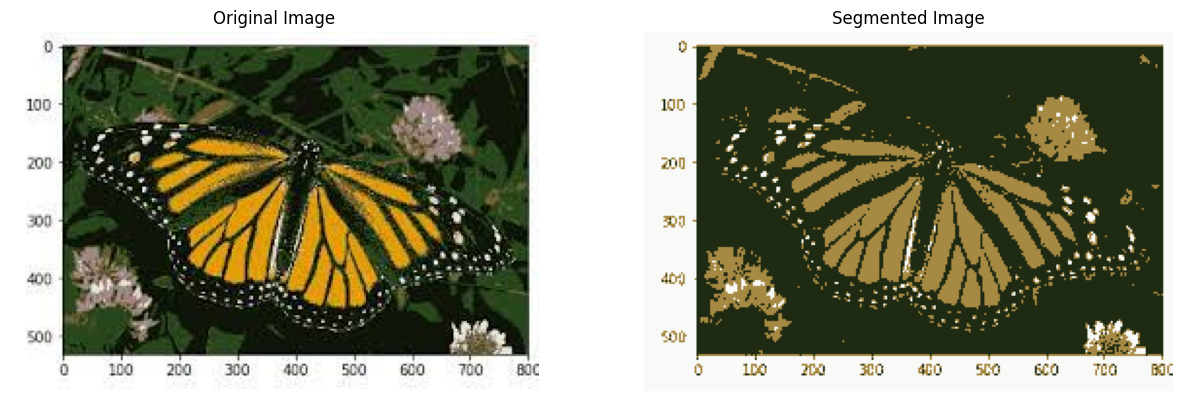

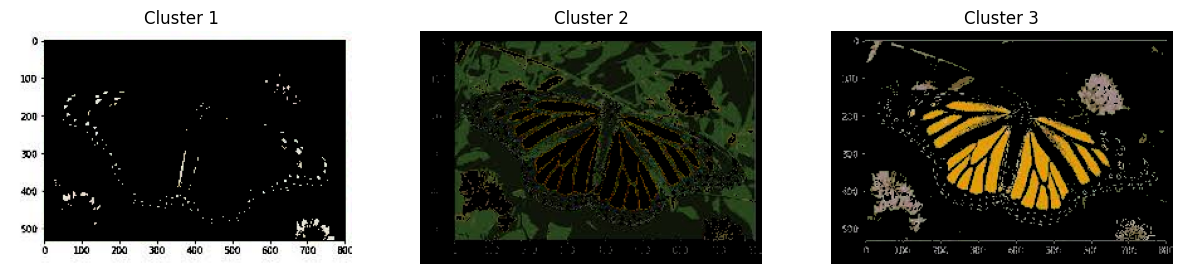

In [3]:
# Ubicación de la imagen y el número de clusters a utilizar
image_path = '/content/data/butterfly.jpg'
num_clusters = 3

# Segmentación de la imagen
original_image, segmented_image, cluster_images = fullsequence(image_path, num_clusters)

# Graficar la imagen original y segmentada
plot_images([original_image, segmented_image], ['Original Image', 'Segmented Image'])

# Graficar las imagenes de cada cluster
plot_images(cluster_images, [f'Cluster {i + 1}' for i in range(num_clusters)])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


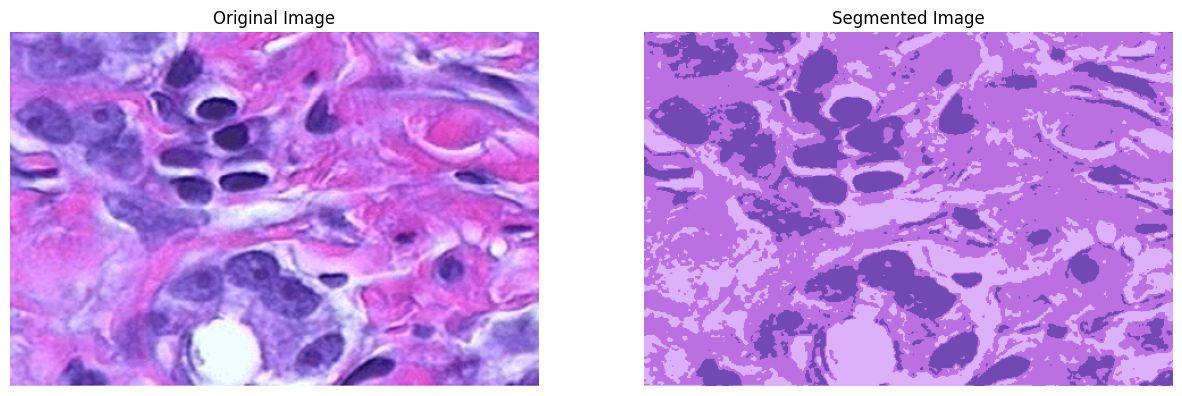

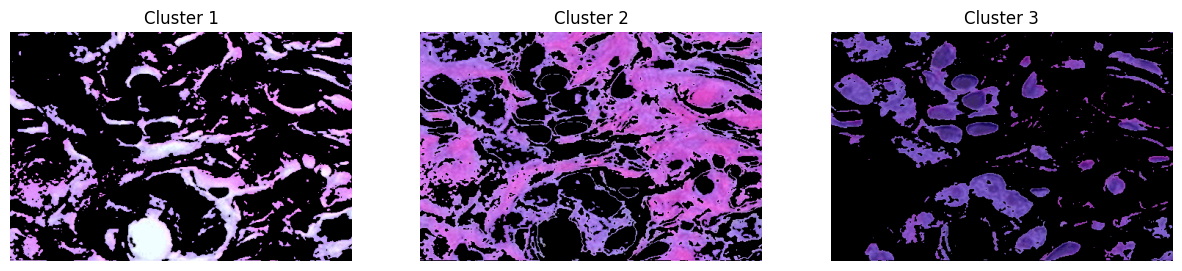

In [5]:
# Ubicación de la imagen y el número de clusters a utilizar
image_path = '/content/data/KMeans.png'
num_clusters = 3

# Segmentación de la imagen y despliegue de la imagen original y segmentada
original_image, segmented_image, cluster_images = fullsequence(image_path, num_clusters)

# Despliegue de las imagenes de cada cluster
plot_images([original_image, segmented_image], ['Original Image', 'Segmented Image'])
plot_images(cluster_images, [f'Cluster {i + 1}' for i in range(num_clusters)])